In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

import torch
import torch.nn as nn


In [ ]:
## A pytorch work flow

#1. Get data ready
#2. Build or pick a model for training
#3. Fit the model to the data and make prediction
#4. Evaluate the model
#5. Improve through Experiment
#6. Save and reload your model 

In [3]:
# Making data
start = 0
end = 1
step = 0.02
X = torch. arange(start,end,step)
print(X.shape)

torch.Size([50])


In [4]:
# Creating Answer for data
# we are going to find weight and bias using model
weigth = 0.7
bias = 0.3
Y = weigth * X + 0.3
print(Y[:10])
print(Y.shape)

tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
        0.4260])
torch.Size([50])


In [8]:
# Train data, test data split

train_split = int(len(X)*0.8)
train_x = X[:train_split]
train_y = Y[:train_split]
test_x = X[train_split:]
test_y = Y[train_split:]

In [11]:
print(train_x.shape)
nn.Parameter(torch.rand(1,dtype = torch.float)).shape

torch.Size([40])


torch.Size([1])

In [47]:
class LinearRegression(nn.Module):

    def __init__(self):
        super().__init__()
        
        self.weight = nn.Parameter(torch.randn(1,dtype = torch.float),requires_grad = True)

        self.bias = nn.Parameter(torch.randn(1,dtype = torch.float),requires_grad = True)

    def forward(self,x):

        return self.weight * x + self.bias



In [48]:
model_0 = LinearRegression()

In [49]:
#Checking the contents of the model 

print(model_0.state_dict())






OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [50]:
# Loss function and optimizer 
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(),lr = 0.01)


In [51]:
torch.manual_seed(42)
epoch = 100

train_loss_values = [] 
test_loss_values = []
epoch_count = []



for i in range(epoch):

    model_0.train()

    y_pred = model_0(train_x)

    
    loss = loss_fn(y_pred,train_y)
    
    
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()

    with torch.inference_mode():

        test = model_0(test_x)

        test_loss = loss_fn(test,test_y)

        epoch_count.append(i)

        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {i}, Train_loss:{train_loss_values[-1]},Test_loss:{test_loss_values[-1]}")



        


        










Epoch: 0, Train_loss:0.31288138031959534,Test_loss:0.48106518387794495
Epoch: 1, Train_loss:0.3013603389263153,Test_loss:0.4675942063331604
Epoch: 2, Train_loss:0.28983935713768005,Test_loss:0.4541231691837311
Epoch: 3, Train_loss:0.2783183455467224,Test_loss:0.44065219163894653
Epoch: 4, Train_loss:0.26679736375808716,Test_loss:0.4271811842918396
Epoch: 5, Train_loss:0.2552763521671295,Test_loss:0.41371020674705505
Epoch: 6, Train_loss:0.24375534057617188,Test_loss:0.40023916959762573
Epoch: 7, Train_loss:0.23223432898521423,Test_loss:0.3867681920528412
Epoch: 8, Train_loss:0.22071333229541779,Test_loss:0.37329721450805664
Epoch: 9, Train_loss:0.20919232070446014,Test_loss:0.3598262071609497
Epoch: 10, Train_loss:0.1976713240146637,Test_loss:0.3463551998138428
Epoch: 11, Train_loss:0.18615034222602844,Test_loss:0.3328842222690582
Epoch: 12, Train_loss:0.1746293306350708,Test_loss:0.3194132149219513
Epoch: 13, Train_loss:0.16310831904411316,Test_loss:0.30594223737716675
Epoch: 14, Trai

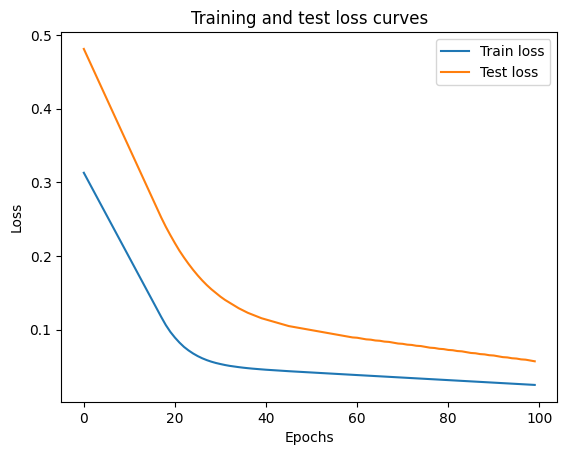

In [52]:
# Plot the loss curves
plt.plot(epoch_count,train_loss_values, label="Train loss")
plt.plot(epoch_count,test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [53]:
# We can see that model parmeters are almost same as what we had set originally 
model_0.state_dict()


OrderedDict([('weight', tensor([0.5784])), ('bias', tensor([0.3513]))])